In [8]:
from MIND import compute_MIND
from get_vertex_df import get_vertex_df

In [15]:
# surf_dir = r'\\wsl$\Ubuntu-22.04\home\efekan\tutorial\tutorial_data_20190918_1558\buckner_data\tutorial_subjs\good_output'
surf_dir =r'C:\Users\efeka\Documents\GitHub\MIND\I167592'
features = ['CT','Vol','SA','MC','SD']
parcellation = 'aparc'

In [16]:
vertex_data, regions, features_used  = get_vertex_df(surf_dir, features, parcellation)

lh
Loading left hemisphere data:
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.thickness
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.volume
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.area
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.curv
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.sulc
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
0 Feature_0
1 Feature_1
2 Feature_2
3 Feature_3
4 Feature_4
rh
Loading right hemisphere data:
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
0 Feature_0
1 Feature_1
2 Feature_2
3 Feature_3
4 Feature_4
features used: 
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']


In [17]:
print(vertex_data)

                          Label  Feature_0  Feature_1  Feature_2  Feature_3  \
0           lh_lateraloccipital   2.424535   0.273949   0.095081  -0.283022   
1           lh_lateraloccipital   2.349262   1.219599   0.389132  -0.264508   
2           lh_lateraloccipital   2.294253   0.391618   0.141046  -0.308147   
3           lh_lateraloccipital   2.358698   0.780581   0.269487  -0.288895   
4           lh_lateraloccipital   2.258646   1.144395   0.371338  -0.259888   
...                         ...        ...        ...        ...        ...   
244284  rh_lateralorbitofrontal   2.698936   5.347417   1.867720  -0.116604   
244285  rh_lateralorbitofrontal   2.499653   0.555519   0.185387  -0.250192   
244286   rh_medialorbitofrontal   2.708589   4.005864   1.120642  -0.185875   
244287  rh_lateralorbitofrontal   2.420671   5.253193   1.834729  -0.121230   
244288   rh_medialorbitofrontal   2.533160   0.529124   0.168801  -0.281766   

        Feature_4  
0       -0.502439  
1       -0.

In [18]:
mind_graph = compute_MIND(surf_dir, features, parcellation)

lh
Loading left hemisphere data:
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.thickness
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.volume
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.area
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.curv
C:\Users\efeka\Documents\GitHub\MIND\I167592/surf/lh.sulc
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
0 Feature_0
1 Feature_1
2 Feature_2
3 Feature_3
4 Feature_4
rh
Loading right hemisphere data:
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
0 Feature_0
1 Feature_1
2 Feature_2
3 Feature_3
4 Feature_4
features used: 
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
Computing MIND...
Done!


In [20]:
mind_graph.keys()

Index(['lh_bankssts', 'lh_caudalanteriorcingulate', 'lh_caudalmiddlefrontal',
       'lh_cuneus', 'lh_entorhinal', 'lh_fusiform', 'lh_inferiorparietal',
       'lh_inferiortemporal', 'lh_isthmuscingulate', 'lh_lateraloccipital',
       'lh_lateralorbitofrontal', 'lh_lingual', 'lh_medialorbitofrontal',
       'lh_middletemporal', 'lh_parahippocampal', 'lh_paracentral',
       'lh_parsopercularis', 'lh_parsorbitalis', 'lh_parstriangularis',
       'lh_pericalcarine', 'lh_postcentral', 'lh_posteriorcingulate',
       'lh_precentral', 'lh_precuneus', 'lh_rostralanteriorcingulate',
       'lh_rostralmiddlefrontal', 'lh_superiorfrontal', 'lh_superiorparietal',
       'lh_superiortemporal', 'lh_supramarginal', 'lh_frontalpole',
       'lh_temporalpole', 'lh_transversetemporal', 'lh_insula', 'rh_bankssts',
       'rh_caudalanteriorcingulate', 'rh_caudalmiddlefrontal', 'rh_cuneus',
       'rh_entorhinal', 'rh_fusiform', 'rh_inferiorparietal',
       'rh_inferiortemporal', 'rh_isthmuscingulate',

In [21]:
mind_graph

,lh_bankssts,lh_caudalanteriorcingulate,lh_caudalmiddlefrontal,lh_cuneus,lh_entorhinal,lh_fusiform,lh_inferiorparietal,lh_inferiortemporal,lh_isthmuscingulate,lh_lateraloccipital,...,rh_rostralanteriorcingulate,rh_rostralmiddlefrontal,rh_superiorfrontal,rh_superiorparietal,rh_superiortemporal,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula
lh_bankssts,0.000000,0.111455,0.205555,0.082540,0.088371,0.168538,0.190154,0.143821,0.154666,0.105611,...,0.125623,0.123770,0.178099,0.158799,0.186620,0.182046,0.057864,0.069399,0.102178,0.172483
lh_caudalanteriorcingulate,0.111455,0.000000,0.102141,0.081022,0.099575,0.162388,0.136946,0.164185,0.191370,0.109207,...,0.205409,0.111197,0.138302,0.117043,0.117142,0.130599,0.056426,0.083676,0.102038,0.104798
lh_caudalmiddlefrontal,0.205555,0.102141,0.000000,0.100914,0.099231,0.174813,0.239275,0.179147,0.172782,0.152695,...,0.122024,0.185188,0.260978,0.260693,0.249878,0.273378,0.093508,0.079897,0.116317,0.142096
lh_cuneus,0.082540,0.081022,0.100914,0.000000,0.063679,0.101578,0.126400,0.109544,0.118160,0.208776,...,0.080117,0.139886,0.118076,0.169723,0.097690,0.135991,0.084108,0.055804,0.098716,0.068705
lh_entorhinal,0.088371,0.099575,0.099231,0.063679,0.000000,0.136854,0.116529,0.158685,0.106583,0.091270,...,0.101219,0.101173,0.123330,0.098889,0.130723,0.109100,0.076383,0.188012,0.077590,0.089881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_supramarginal,0.182046,0.130599,0.273378,0.135991,0.109100,0.209246,0.324754,0.221539,0.197694,0.206739,...,0.145186,0.250240,0.285424,0.333769,0.254698,0.000000,0.092026,0.086073,0.153049,0.136273
rh_frontalpole,0.057864,0.056426,0.093508,0.084108,0.076383,0.067548,0.082496,0.079448,0.081321,0.108747,...,0.057768,0.087354,0.092771,0.131178,0.094114,0.092026,0.000000,0.075048,0.059666,0.050300
rh_temporalpole,0.069399,0.083676,0.079897,0.055804,0.188012,0.089623,0.084061,0.112045,0.084453,0.074327,...,0.074051,0.073967,0.096831,0.078581,0.110947,0.086073,0.075048,0.000000,0.059388,0.070523
rh_transversetemporal,0.102178,0.102038,0.116317,0.098716,0.077590,0.143079,0.156105,0.125002,0.117109,0.107556,...,0.135637,0.136420,0.131636,0.144782,0.117977,0.153049,0.059666,0.059388,0.000000,0.108898


c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


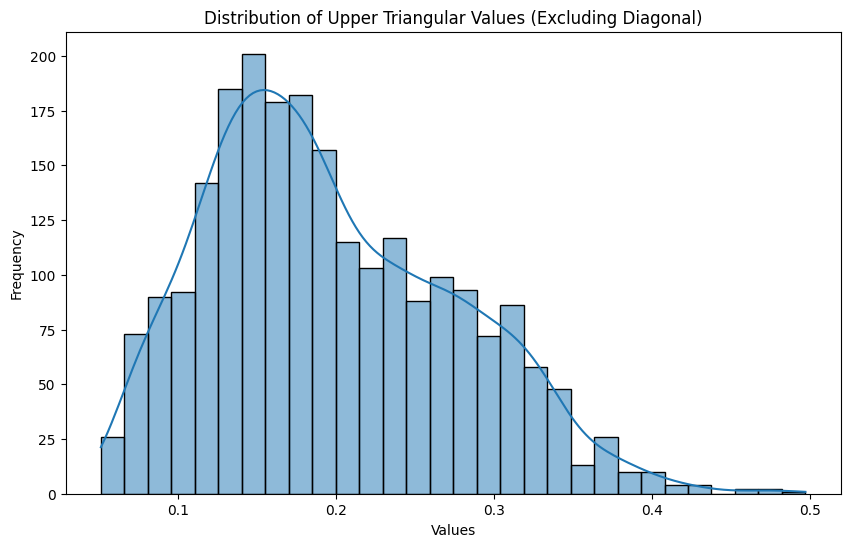

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract upper triangular values (excluding diagonal)
upper_tri_values = mind_graph.where(np.triu(np.ones(mind_graph.shape), k=1).astype(bool)).stack().values

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(upper_tri_values, bins=30, kde=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Upper Triangular Values (Excluding Diagonal)")
plt.show()
